<a href="https://colab.research.google.com/github/dinonge-star/machine_learning/blob/main/6_2_Clustering_with_K_Means(Kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Recap **Clustering With K-Means** with the material that kaggle provides
- [kaggle link](https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means)

- Example : California Housing
 - 'Latitude' and 'Longitude' make natural candidates for k-means clustering. In this example we'll cluster these with 'MedInc' (median income) to create economic segments in different regions of California.

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read housing.csv

import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/housing.csv')

In [ ]:
# we will use only longitude, latitude, median income data 

X = dataset.loc[:, ['median_income', 'longitude', 'latitude']]
X.head()

,median_income,longitude,latitude
0,8.3252,-122.23,37.88
1,8.3014,-122.22,37.86
2,7.2574,-122.24,37.85
3,5.6431,-122.25,37.85
4,3.8462,-122.25,37.85


In [ ]:
# Create cluster feature
from sklearn.cluster import KMeans

km = KMeans(n_clusters=6)
km.fit(X)
X['Cluster'] = km.predict(X)
X.head()

0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64


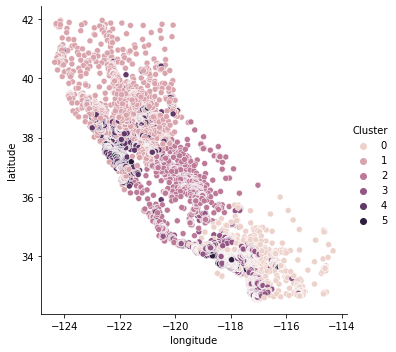

In [ ]:
# Let's see how it's done
import seaborn as sb
sb.relplot(x = "longitude", y='latitude', hue='Cluster', data=X);

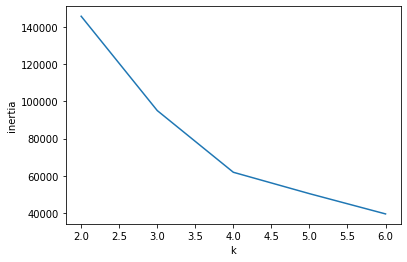

In [ ]:
# n_cluster = 6 
# was 6 the optimal number?

inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X)
  inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# n_cluster = 3 or 4 가 나을 듯

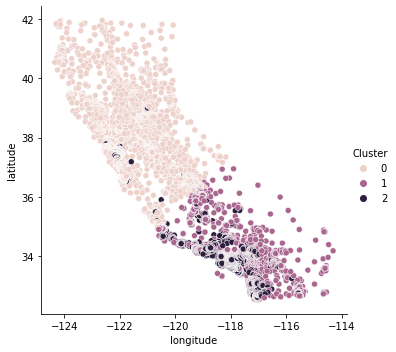

In [ ]:
km = KMeans(n_clusters=3)
km.fit(X)
X['Cluster'] = km.predict(X)
sb.relplot(x = "longitude", y='latitude', hue='Cluster', data=X);